In [1]:
# 调库,这里的gdatasdk是服务器环境的库
import pandas as pd
import numpy as np
from qdatasdk import *
import matplotlib.pyplot as plt
from MyModel import Model1, Model2, DataCleaner

# 加载parameters
security=get_all_securities().index.tolist()
start_date=["2021-01-01","2022-01-01","2023-01-01"]
end_date=["2021-12-31","2022-12-31","2023-12-31"]
dates=get_trade_days(start_date=start_date[0], end_date=end_date[2], count=None)
#这里返回的是一个datetime的list
# 现在建立一个dataframe，index是dates，columns名是loss_ratio，初始值均为0
result=pd.DataFrame(index=dates,columns=["loss_ratio","loss_ratio_list"])
result["loss_ratio"] = result["loss_ratio"].apply(lambda x: 1000)
result["loss_ratio_list"] = result["loss_ratio_list"].apply(lambda x: [])

# 定义结果
Model1_R2=[]
Model1_beta=[]
Model1_alpha=[]
Model2_R2=[]
Model2_beta_1=[]
Model2_beta_7=[]
Model2_alpha=[]

# security=security[0:10]
security

['000001.XSHE',
 '000002.XSHE',
 '000004.XSHE',
 '000005.XSHE',
 '000006.XSHE',
 '000007.XSHE',
 '000008.XSHE',
 '000009.XSHE',
 '000010.XSHE',
 '000011.XSHE',
 '000012.XSHE',
 '000014.XSHE',
 '000016.XSHE',
 '000017.XSHE',
 '000018.XSHE',
 '000019.XSHE',
 '000020.XSHE',
 '000021.XSHE',
 '001872.XSHE',
 '000023.XSHE',
 '000024.XSHE',
 '000025.XSHE',
 '000026.XSHE',
 '000027.XSHE',
 '000028.XSHE',
 '000029.XSHE',
 '000030.XSHE',
 '000031.XSHE',
 '000032.XSHE',
 '000033.XSHE',
 '000034.XSHE',
 '000035.XSHE',
 '000036.XSHE',
 '000037.XSHE',
 '000038.XSHE',
 '000039.XSHE',
 '000040.XSHE',
 '000042.XSHE',
 '001914.XSHE',
 '000045.XSHE',
 '000046.XSHE',
 '000048.XSHE',
 '000049.XSHE',
 '000050.XSHE',
 '000055.XSHE',
 '000056.XSHE',
 '000058.XSHE',
 '000059.XSHE',
 '000060.XSHE',
 '000061.XSHE',
 '000062.XSHE',
 '000063.XSHE',
 '000065.XSHE',
 '000066.XSHE',
 '000068.XSHE',
 '000069.XSHE',
 '000070.XSHE',
 '000078.XSHE',
 '000088.XSHE',
 '000089.XSHE',
 '000090.XSHE',
 '000096.XSHE',
 '000099

In [2]:
# 加载数据
cnt=0
for i in security:
    df1 = get_bars(security=str(i), start_date=start_date[0], end_date=end_date[0], unit="1m",type="stock")
    if df1 is None:
        print(f"数据获取失败: {str(i)}")
        continue
    df2 = get_bars(security=str(i), start_date=start_date[1], end_date=end_date[1], unit="1m",type="stock")
    if df2 is None:
        print(f"数据获取失败: {str(i)}")
        continue
    df3 = get_bars(security=str(i), start_date=start_date[2], end_date=end_date[2], unit="1m",type="stock")
    if df3 is None:
        print(f"数据获取失败: {str(i)}")
        continue
    df = pd.concat([df1, df2, df3], axis=0)
    if df is None:
        print(f"数据获取失败: {str(i)}")
        continue
    df = df.reset_index().rename(columns={'index': 'date'})

    # 清洗数据
    dataCleaner=DataCleaner(df)
    dataCleaner.clean()
    r1=dataCleaner.getR1()
    r7=dataCleaner.getR7()
    r8=dataCleaner.getR8()
    theDates=dataCleaner.getDates()
    
    # 拟合模型
    model1=Model1(r8,r1)
    model1.fit()
    Model1_R2.append(model1.getR2())
    Model1_beta.append(model1.getBeta())
    Model1_alpha.append(model1.getAlpha())
    # print("Model1 Alpha:", model1.getAlpha())
    # print("Model1 Beta:", model1.getBeta())
    # print("Model1 R2:", model1.getR2())
    # model1.plot()

    model2 = Model2(r8, r1, r7)
    model2.fit()
    Model2_R2.append(model2.getR2())
    Model2_beta_1.append(model2.getBeta_r1())
    Model2_beta_7.append(model2.getBeta_r7())
    Model2_alpha.append(model2.getAlpha())
    # print("Model2 Alpha:", model2.getAlpha())
    # print("Model2 Beta_r1:", model2.getBeta_r1())
    # print("Model2 Beta_r7:", model2.getBeta_r7())
    # print("Model2 R2:", model2.getR2())
    # model2.plot()

    #计算每个date的偏差率，加入到对应的date的loss_ratio_list中
    for j in range(len(r1)):
        if pd.to_datetime(theDates[j]).date() in dates:
            result.loc[result.index == pd.to_datetime(theDates[j]).date(), "loss_ratio_list"].values[0].append(model1.getLossRatio(r1[j], r8[j]))
    
    
    cnt+=1
    print("\r Progress:{}/{}       ".format(cnt,len(security)),end="")


 Progress:14/5099       数据获取失败: 000018.XSHE
 Progress:19/5099       数据获取失败: 000024.XSHE
 Progress:27/5099       数据获取失败: 000033.XSHE
 Progress:75/5099       数据获取失败: 000406.XSHE
 Progress:84/5099       数据获取失败: 000418.XSHE
 Progress:97/5099       数据获取失败: 000502.XSHE
 Progress:102/5099       数据获取失败: 000508.XSHE
 Progress:104/5099       数据获取失败: 000511.XSHE
 Progress:106/5099       数据获取失败: 000515.XSHE
 Progress:112/5099       数据获取失败: 000522.XSHE
 Progress:116/5099       数据获取失败: 000527.XSHE
 Progress:129/5099       数据获取失败: 000542.XSHE
 Progress:135/5099       数据获取失败: 000549.XSHE
 Progress:146/5099       数据获取失败: 000562.XSHE
 Progress:152/5099       数据获取失败: 000569.XSHE
 Progress:157/5099       数据获取失败: 000578.XSHE
 Progress:160/5099       数据获取失败: 000585.XSHE
 Progress:167/5099       数据获取失败: 000594.XSHE
 Progress:174/5099       数据获取失败: 000602.XSHE
 Progress:181/5099       数据获取失败: 000611.XSHE
 Progress:182/5099       数据获取失败: 000613.XSHE
 Progress:185/5099       数据获取失败: 000618.XSHE
 Progress:211/50

In [3]:
#计算result每个日期对应的loss_ratio_list的均值存入result的loss_ratio中
for i in range(result.__len__()):
    result.loc[result.index[i],"loss_ratio"]=np.nanmean(result.loc[result.index[i],"loss_ratio_list"])

#按照loss_ratio从小到大排序
result=result.sort_values(by="loss_ratio",ascending=True)
print(result)
result.to_csv("result.csv",columns=["loss_ratio"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


            loss_ratio                                    loss_ratio_list
2023-09-12    0.002031  [0.0015280870856349904, 0.0011200807350605392,...
2023-09-11    0.002101  [0.0006234042828114348, 0.0019072651360618367,...
2023-11-20    0.002118  [0.00034796208356316046, 0.0004532621605990834...
2023-09-28    0.002124  [0.0024058890166950868, 0.0010953223162635736,...
2023-11-15    0.002166  [0.0003632334748924599, 0.0005797815093668888,...
...                ...                                                ...
2023-12-29         NaN                                                 []
2023-12-28         NaN                                                 []
2023-02-07         NaN                                                 []
2021-12-31         NaN                                                 []
2021-09-30         NaN                                                 []

[727 rows x 2 columns]


Model1_R2:0.007852871270392938
Model1_beta:0.014303567342607711


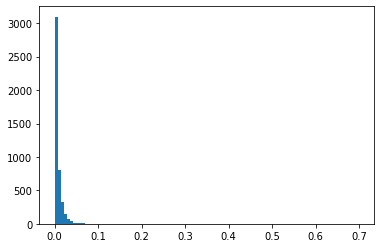

Model2_R2:0.017052289895534988
Model2_beta_1:0.014303567342607711
Model2_beta_7:-0.009039494474566158


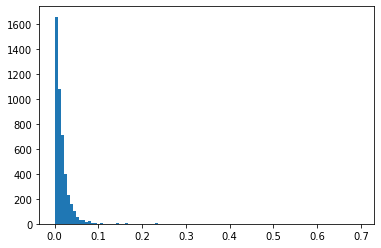

In [4]:
# 统计数据
print("Model1_R2:"+str(np.nanmean(Model1_R2)))
print("Model1_beta:"+str(np.nanmean(Model1_beta)))
plt.hist(Model1_R2,100)
plt.show()

print("Model2_R2:"+str(np.nanmean(Model2_R2)))
print("Model2_beta_1:"+str(np.nanmean(Model2_beta_1)))
print("Model2_beta_7:"+str(np.nanmean(Model2_beta_7)))
plt.hist(Model2_R2,100)
plt.show()